# HOW TO PLOT A CYLINDER USING PYTHON

After working on a sphere, I want to try to adapt its concepts to a cylinder.
First I will try my concentric circle method, then I will try to adapt the compact code found in the documentation (if at all possible), lastly I will try to work out a way to use the "add 3d polygons" function, similarly to what we have done for the dodecahedron, with the added complication that the side of the barrel is not an easy polygon to draw (I will have to figure out how to do that).

Let us start easy and go back to my method of concentric circles.
In this case the radius is fixed, so it should be a lot easier, I can remove the r altogether. 

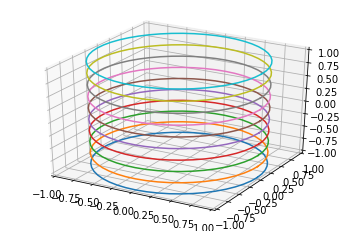

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

alpha = np.linspace(0, 2*np.pi, 50)
z = np.linspace(-1,1,10)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
for i in range(len(z)):
    x = np.cos(alpha)
    y = np.sin(alpha)
    height = z[i]
    plt.plot(x,y,height)
plt.show()

Perfect! That worked out from the get go! 
Let us try the second method now, to get a surface:

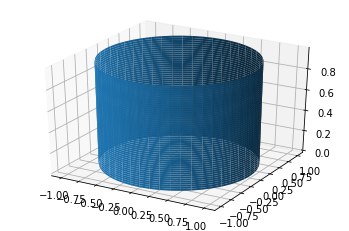

In [3]:
x = np.zeros([50,50])
y = np.zeros([50,50])
height = np.zeros([50,50])
for i in range(len(x)):
    x[i] = np.cos(alpha)
    y[i] = np.sin(alpha)
    height[i] = i/(len(x))
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.plot_surface(x,y,height)

This method did not work out for cylinder, since the solid is missing the top and bottom layers and we cannot do that simply by approximating circles, same as we did before. We need to use the method of "adding polygons", I think. Before doing that, I will try to adjust the algorithm found in the documentations for a sphere:

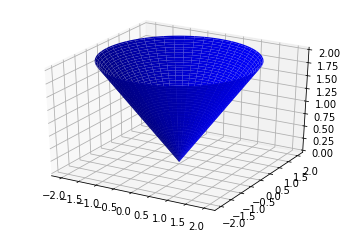

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, 2, 100)
x = np.outer(np.cos(u), v)
y = np.outer(np.sin(u), v)
z = np.outer(np.ones(np.size(u)), v)

# Plot the surface
ax.plot_surface(x, y, z, color='b')

plt.show()

This was unexpected but interesting. The problem seems to be with the y coordinate: 

In [13]:
print(y)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.28129131e-03  2.56258261e-03 ...  1.24285257e-01
   1.25566548e-01  1.26847839e-01]
 [ 0.00000000e+00  2.55742330e-03  5.11484661e-03 ...  2.48070061e-01
   2.50627484e-01  2.53184907e-01]
 ...
 [-0.00000000e+00 -2.55742330e-03 -5.11484661e-03 ... -2.48070061e-01
  -2.50627484e-01 -2.53184907e-01]
 [-0.00000000e+00 -1.28129131e-03 -2.56258261e-03 ... -1.24285257e-01
  -1.25566548e-01 -1.26847839e-01]
 [-0.00000000e+00 -4.94806788e-18 -9.89613575e-18 ... -4.79962584e-16
  -4.84910652e-16 -4.89858720e-16]]


We need to find a way to make sure the y coordinate looks a lot more like the x and z coordinates and the list is full of repeating lists, somehow. 
Let us try this:

In [16]:
y = np.outer(np.ones(np.size(u)), np.sin(u))
print(y)

[[ 0.00000000e+00  6.34239197e-02  1.26592454e-01 ... -1.26592454e-01
  -6.34239197e-02 -2.44929360e-16]
 [ 0.00000000e+00  6.34239197e-02  1.26592454e-01 ... -1.26592454e-01
  -6.34239197e-02 -2.44929360e-16]
 [ 0.00000000e+00  6.34239197e-02  1.26592454e-01 ... -1.26592454e-01
  -6.34239197e-02 -2.44929360e-16]
 ...
 [ 0.00000000e+00  6.34239197e-02  1.26592454e-01 ... -1.26592454e-01
  -6.34239197e-02 -2.44929360e-16]
 [ 0.00000000e+00  6.34239197e-02  1.26592454e-01 ... -1.26592454e-01
  -6.34239197e-02 -2.44929360e-16]
 [ 0.00000000e+00  6.34239197e-02  1.26592454e-01 ... -1.26592454e-01
  -6.34239197e-02 -2.44929360e-16]]


This does what I wanted it to do, but let us check if it shows as a cylinder now: 

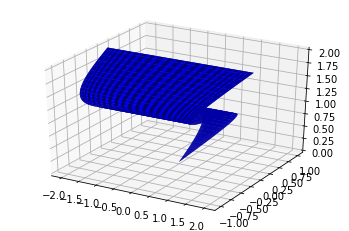

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, 2, 100)
x = np.outer(np.cos(u), v)
y = np.outer(np.ones(np.size(u)), np.sin(u))
z = np.outer(np.ones(np.size(u)), v)

# Plot the surface
ax.plot_surface(x, y, z, color='b')

plt.show()

Obviously not there yet. I will try different combinations of the above, tinkering around, hoping to understand how this "outer" attribute works (it is really quite confusing still)

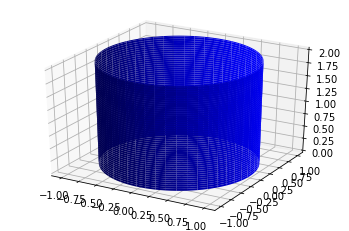

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, 2, 100)
x = np.outer(np.cos(u), np.ones(np.size(u)))
y = np.outer(np.sin(u), np.ones(np.size(u)))
z = np.outer(np.ones(np.size(u)), v)

# Plot the surface
ax.plot_surface(x, y, z, color='b')

plt.show()

Bingo. Unfortunately though this system has the same issue as the much easier to understand procedure that I devised above. 
Let us try to go to polygon addition, using the function I have used for the dodecahedron.
I guess let us start from the circles. First I need to create a scatter plot for all of the dots in 3D space. 

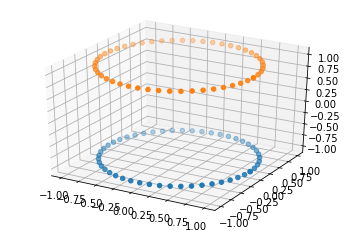

In [27]:
alpha = np.linspace(0, 2*np.pi, 50)
z = np.linspace(-1,1,2)

fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
for i in range(len(z)):
    x = np.cos(alpha)
    y = np.sin(alpha)
    height = z[i]
    ax.scatter(x,y,height)
plt.show()

Going back to my procedure for the dodecahedron, taken almost entirely from the documentation, we now stumble into a problem, as I think it is impractical to name each vertex for each of the polygon in the solid (ideally we want as many points as possible to have a smooth circle). 
Therefore let us try to break down the function to add polygon and see if I can use it for one circle at a time. 

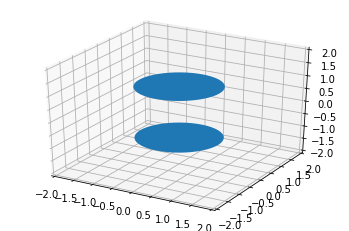

In [4]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

alpha = np.linspace(0, 2*np.pi, 50)
z = [1,-1]
v_1 = []
v_2 = []
for i in range(len(alpha)):
    v_1.append((np.cos(alpha[i]),np.sin(alpha[i]),z[0]))
    v_2.append((np.cos(alpha[i]),np.sin(alpha[i]),z[1]))
    
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)
c = Poly3DCollection([v_1,v_2], linewidths=1, alpha=1) 
ax.add_collection3d(c)
plt.show()


To obtain the above I had to toggle a few times, since the Poly3DCollection fuction takes a strange format [polygon1,polygon2,etc] with each polygon being a [(vert1),(vert2),(vert3),etc] and each vert an ordered triplet of coordinates (x,y,z). 

Now we have to do the side of the barrel. 
I have tried to do that by reversing one of the circle coordinate list and putting the two circles into one big list, hoping to generate a large "curved sheet". This has thrown an error and I have realized that the polygon function will only work if all of the vertices can be found on the same plane. Therefore I think I have two choices: either I create a very dense sequence of rectangles all around the sides of the two circles, or I can fill the cylinders with many circles along its height. Let us try the second method, as it looks easier. 

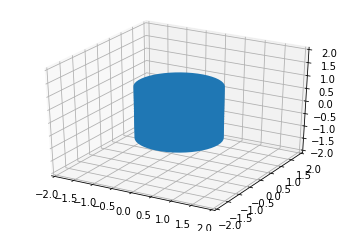

In [28]:
alpha = np.linspace(0, 2*np.pi, 50)
z = np.linspace(-1,1,20)
v = []
for s in range(20):
    v.append([])

for p in range(len(z)):
    for i in range(len(alpha)):
        v[p].append((np.cos(alpha[i]),np.sin(alpha[i]),z[p]))
    
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)
c = Poly3DCollection(v, linewidths=1, alpha=1) 
ax.add_collection3d(c)
plt.show()


This first method worked out ok, but I think it is quite CPU intensive. 
Before trying to work with a large some of side rectangles, which does not seem to be any better than above, I will check on the internet if there is any easier method to obtain the same result. 

After a quick search, most results are similar to my first attempt above, which creates a cylinder without top and bottom. 

I think that based on this what I need to do is a combination of the two procedures above: using plot_surface for the side barrel and add_polygon for the top and bottom.
Let us work on this: 

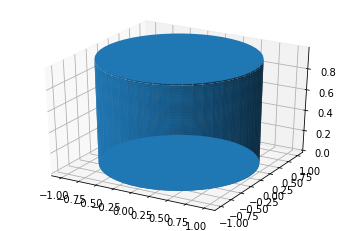

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# create the side of the barrel
alpha = np.linspace(0, 2*np.pi, 50)
x = np.zeros([50,50])
y = np.zeros([50,50])
height = np.zeros([50,50])
for i in range(len(x)):
    x[i] = np.cos(alpha)
    y[i] = np.sin(alpha)
    height[i] = i/(len(x))
    
# create the top and bottom
z = [1,0]
v_1 = []
v_2 = []
for i in range(len(alpha)):
    v_1.append((np.cos(alpha[i]),np.sin(alpha[i]),z[0]))
    v_2.append((np.cos(alpha[i]),np.sin(alpha[i]),z[1]))

# plot all of them
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.plot_surface(x,y,height)
c = Poly3DCollection([v_1,v_2], linewidths=1, alpha=1) 
c.set_facecolor("yellow")
ax.add_collection3d(c)
plt.show()

This seems to have worked. We could try to make the colours of the top and bottom different, as following: 

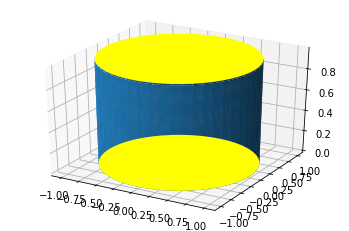

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# create the side of the barrel
alpha = np.linspace(0, 2*np.pi, 50)
x = np.zeros([50,50])
y = np.zeros([50,50])
height = np.zeros([50,50])
for i in range(len(x)):
    x[i] = np.cos(alpha)
    y[i] = np.sin(alpha)
    height[i] = i/(len(x))
    
# create the top and bottom
z = [1,0]
v_1 = []
v_2 = []
for i in range(len(alpha)):
    v_1.append((np.cos(alpha[i]),np.sin(alpha[i]),z[0]))
    v_2.append((np.cos(alpha[i]),np.sin(alpha[i]),z[1]))

# plot all of them
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.plot_surface(x,y,height)
c = Poly3DCollection([v_1,v_2], linewidths=1, alpha=1) 
c.set_facecolor("yellow")
ax.add_collection3d(c)
plt.show()

It was easy to do both top and bottom of the same colour but this does not work in case we want to do them in a different colour. I will try to understand how that works in a different solid.
Last thing I want to do on the cylinder before closing this chapter is to see if the wireframe model could potentially solve the issue, although it would not look solid. 
Let us try: 

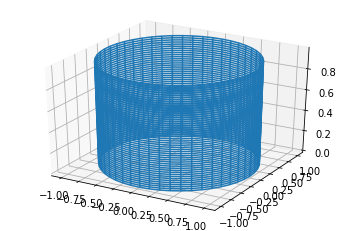

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

alpha = np.linspace(0, 2*np.pi, 50)
x = np.zeros([50,50])
y = np.zeros([50,50])
height = np.zeros([50,50])
for i in range(len(x)):
    x[i] = np.cos(alpha)
    y[i] = np.sin(alpha)
    height[i] = i/(len(x))

fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.plot_wireframe(x,y,height)
plt.show()

No, unfortunately this confirms that the simpler algorithm does not include top and bottom.